In [49]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
# checking exsistance of duplicate rows
data.duplicated().sum()

0

In [6]:
# check null values
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text preprocessing

In [7]:
import re
import string

In [8]:
data['tweet'].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

convert uppercase to lowercase

In [9]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove links

In [11]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '',x,flags = re.MULTILINE) for x in x.split()))

In [12]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove functuations

In [13]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text
data['tweet'] = data['tweet'].apply(remove_punctuations)

In [14]:
data['tweet'].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

Remove numbers

In [15]:
data['tweet'] = data['tweet'].str.replace('\d+', '', regex = True)

In [16]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove stopwords

In [17]:
import nltk

In [18]:
nltk.download('stopwords', download_dir = '../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [20]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [22]:
data['tweet'].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [23]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [24]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split() ))

In [25]:
data['tweet'].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

## Building Vocabulary

In [26]:
from collections import Counter 
vocab = Counter()

In [27]:
vocab

Counter()

In [28]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [29]:
# no of uniqe words
#vocab
len(vocab)

15949

In [30]:
tokens = [key for key in vocab if vocab[key]> 10]

In [31]:
# tokens
len(tokens)

1145

In [32]:
# save vocabulary file
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename,'w',encoding = 'utf-8')
    file.write(data)
    file.close()
    
save_vocabulary(tokens, '../static/model/vocabulary.txt')

## Divide Dataset

In [33]:
X = data['tweet']
y = data['label']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, y , test_size = 0.2)

In [35]:
X_train.shape

(6336,)

In [36]:
y_test.shape

(1584,)

## Vectorization

In [37]:
def vectorizer(ds,vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
        
        vectorized_lst.append(sentence_lst)
    vectorized_lst_new = np.asarray(vectorized_lst, dtype = np.float32)
    
    return vectorized_lst_new

In [38]:
vectorized_X_train = vectorizer(X_train,tokens)

In [40]:
vectorized_X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
vectorized_X_test = vectorizer(X_test,tokens)

In [42]:
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
y_train

6378    0
5613    0
6996    0
6491    0
5156    0
       ..
1958    1
7693    0
1213    0
4130    0
7221    1
Name: label, Length: 6336, dtype: int64

In [45]:
y_train.value_counts()

label
0    4737
1    1599
Name: count, dtype: int64

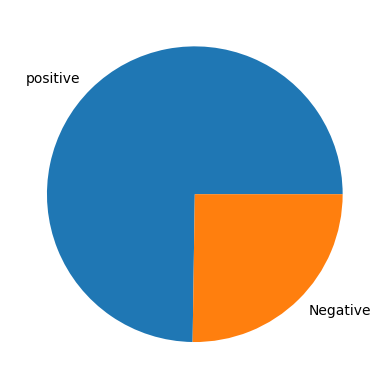

In [51]:
# this is imbalance. should be handled
import matplotlib.pyplot as plt
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels = ['positive','Negative'])
plt.show()

## Handle imbalanced dataset

In [56]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE() 
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_X_train, y_train) 
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9474, 1145) (9474,)


In [57]:
y_train_smote.value_counts()

label
0    4737
1    4737
Name: count, dtype: int64

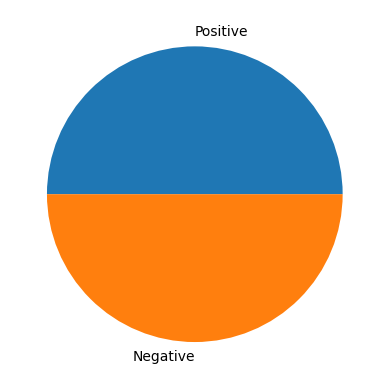

In [60]:
import matplotlib.pyplot as plt
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels = ['Positive','Negative'])
plt.show()

In [61]:
# we use for model building
# for trainnig
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9469    1
9470    1
9471    1
9472    1
9473    1
Name: label, Length: 9474, dtype: int64

In [64]:
# for testing
vectorized_X_test


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
y_test

2029    1
4826    1
6971    0
7302    0
2993    1
       ..
4121    0
5994    0
6821    0
3788    0
7429    0
Name: label, Length: 1584, dtype: int64

# Model trainig and evaluation

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [74]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f"Training scores : \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f"Testing scores : \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")   

### Logistic Regression

In [81]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)
y_test_pred = lr.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training scores : 
	Accuracy = 0.943
	Precision = 0.918
	Recall = 0.972
	F1-Score = 0.944
Testing scores : 
	Accuracy = 0.859
	Precision = 0.71
	Recall = 0.803
	F1-Score = 0.754


### Naive Bayes

In [82]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)
y_test_pred = mnb.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training scores : 
	Accuracy = 0.908
	Precision = 0.874
	Recall = 0.954
	F1-Score = 0.912
Testing scores : 
	Accuracy = 0.853
	Precision = 0.676
	Recall = 0.871
	F1-Score = 0.762


### Decision tree

In [84]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)
y_test_pred = dt.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training scores : 
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing scores : 
	Accuracy = 0.814
	Precision = 0.675
	Recall = 0.6
	F1-Score = 0.635


### RandomForest

In [85]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)
y_test_pred = rf.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training scores : 
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing scores : 
	Accuracy = 0.849
	Precision = 0.747
	Recall = 0.665
	F1-Score = 0.704


### Support vector machine

In [87]:
svm =  SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)
y_test_pred = svm.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training scores : 
	Accuracy = 0.98
	Precision = 0.963
	Recall = 0.997
	F1-Score = 0.98
Testing scores : 
	Accuracy = 0.864
	Precision = 0.735
	Recall = 0.773
	F1-Score = 0.753


In [88]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr,file)